In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Bayes Network

Incidences of diseases A and B (DA,DB) depend on the exposure (E). Disease A is additionally influenced by risk factors (R). Both diseases lead to symptoms (S). Results of the test for disease A (TA) are affected also by disease B. Positive test will be denoted as TA = 1, negative as TA = 0. The Bayes Network is shown in Figure 1. Needed conditional probabilities are shown in Table 1.

In [2]:
from pomegranate import DiscreteDistribution, ConditionalProbabilityTable, Node, State, BayesianNetwork

In [3]:
riskFactor = DiscreteDistribution({"R0": 0.7, "R1": 0.3})
exposure = DiscreteDistribution({"E0": 0.8, "E1": 0.2})

Db = ConditionalProbabilityTable([["E0", "Db0", 0.8],
                                  ["E0", "Db1",0.2],
                                  ["E1", "Db0",0.3],
                                  ["E1", "Db1",0.7]], [exposure])
Da = ConditionalProbabilityTable([["E0", "R0", "Da0", 0.9],
                                  ["E0", "R0", "Da1", 0.1],
                                  ["E0", "R1", "Da0", 0.4],
                                  ["E0", "R1", "Da1", 0.6],
                                  ["E1", "R0", "Da0", 0.5],
                                  ["E1", "R0", "Da1", 0.5],
                                  ["E1", "R1", "Da0", 0.3],
                                  ["E1", "R1", "Da1", 0.7]], [exposure, riskFactor])

S = ConditionalProbabilityTable([["Da0", "Db0", "S0", 0.95],
                                  ["Da0", "Db0", "S1", 0.05],
                                  ["Da0", "Db1", "S0", 0.6],
                                  ["Da0", "Db1", "S1", 0.4],
                                  ["Da1", "Db0", "S0", 0.4],
                                  ["Da1", "Db0", "S1", 0.6],
                                  ["Da1", "Db1", "S0", 0.1],
                                  ["Da1", "Db1", "S1", 0.9]], [Da, Db])

Ta = ConditionalProbabilityTable([["Da0", "Db0", "Ta0", 0.92],
                                  ["Da0", "Db0", "Ta1", 0.08],
                                  ["Da0", "Db1", "Ta0", 0.8],
                                  ["Da0", "Db1", "Ta1", 0.2],
                                  ["Da1", "Db0", "Ta0", 0.15],
                                  ["Da1", "Db0", "Ta1", 0.85],
                                  ["Da1", "Db1", "Ta0", 0.03],
                                  ["Da1", "Db1", "Ta1", 0.97]], [Da, Db])

s1 = State(riskFactor, name="riskFactor")
s2 = State(exposure, name="exposure")
s3 = State(Da, name="Da")
s4 = State(Db, name="Db")
s5 = State(S, name="S")
s6 = State(Ta, name="Ta")

model = BayesianNetwork("Disease")
model.add_nodes(s1, s2, s3, s4, s5, s6)
model.add_edge(s1, s3)
model.add_edge(s2, s3)
model.add_edge(s2, s4)
model.add_edge(s3, s5)
model.add_edge(s3, s6)
model.add_edge(s4, s5)
model.add_edge(s4, s6)

model.bake()

In [4]:
model.predict_proba({})

array([{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "R0" :0.7,
            "R1" :0.3000000000000001
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "E0" :0.7999999999999997,
            "E1" :0.2000000000000004
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Da0" :0.6879999999999996,
            "Da1" :0.31200000000000044
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Db0" :0.6999999999999996,
            "Db1" :0.3000000000000004
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"st

### Performing Inference

(a) What is the probability of disease A (DA = 1), if disease B is not present (DB = 0), but symptoms are present (S = 1).

(b) What is the probability of exposure (E = 1), if symptoms are present (S = 1) and test is positive (TA = 1).

In [5]:
# (a)
model.predict_proba({"Db":"Db0", "S": "S1"})

array([{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "R0" :0.4289652247667518,
            "R1" :0.5710347752332482
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "E0" :0.8481764206955046,
            "E1" :0.1518235793044955
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Da0" :0.1789652247667519,
            "Da1" :0.821034775233248
        }
    ],
    "frozen" :false
},
       'Db0', 'S1',
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Ta1" :0.712196776929601,
            "Ta0" :0.28780322307039885
        }
    ],
    "frozen" :false
}], dtype=object)

So based on above the Bayesian Network, $P(D_{A}=1 | D_{B}=0, S=1) = 0.821034775233248$

In [6]:
#(b) What is the probability of exposure (E = 1), if symptoms are present (S = 1) and test is positive (TA = 1).
model.predict_proba([{'S': "S1", 'Ta': "Ta1"}])

[array([{
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "R0" :0.46352398227589187,
             "R1" :0.5364760177241081
         }
     ],
     "frozen" :false
 },
        {
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "E0" :0.5779343661124118,
             "E1" :0.4220656338875882
         }
     ],
     "frozen" :false
 },
        {
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "Da0" :0.07691902756332904,
             "Da1" :0.9230809724366711
         }
     ],
     "frozen" :false
 },
        {
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "Db0" :0.4589910240916621,
             "Db1" :0.541008975908338
         }
     ],
     "frozen" :f

So based on above the Bayesian Network, $P(E=1 | T_{A}=1, S=1) = 0.4220656338875882$

# 2. Times to Failure.

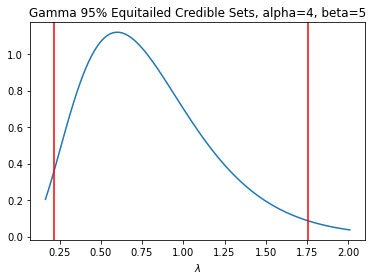

In [7]:
# (d) Numerically find 95% equitailed confidence interval for λ.
from scipy.stats import gamma
fig, ax = plt.subplots(1, 1)
alpha = 4
beta = 5
x = np.linspace(gamma.ppf(0.01, a=alpha, scale=1/beta), gamma.ppf(0.99, a=alpha, scale=1/beta), 100)

ax.plot(x, gamma.pdf(x, a=alpha, scale=1/beta))
plt.axvline(x=gamma.ppf(0.025, a=alpha, scale=1/beta),color='r')
plt.axvline(x=gamma.ppf(0.975, a=alpha, scale=1/beta),color='r')
plt.title("Gamma 95% Equitailed Credible Sets, alpha=4, beta=5")
plt.xlabel("$\lambda$")
plt.show()

In [8]:
print("lambda range in 95% Equitailed Credible Set:[{}, {}]".format(gamma.ppf(0.025, a=alpha, scale=1/beta), 
                                                                   gamma.ppf(0.975, a=alpha, scale=1/beta)))

lambda range in 95% Equitailed Credible Set:[0.21797307472526498, 1.7534546139484648]


In [9]:
# (e) Find the posterior probability of hypothesis H0 : λ ≤ 1/2.
gamma.cdf(1/2, a=alpha, loc=0, scale=1/beta)

0.2424238668669339

# 3. Gibbs and High/Low Protein Diet in Rats.

In [10]:
high = np.array([134, 146, 104, 119, 124, 161, 107, 83, 113, 129, 97, 123])
low = np.array([70, 118, 101, 85, 107, 132, 94])

In [11]:
## setup for theta1, tau1
theta1 = 1
tau1 = 1
y1_sum = high.sum() # 1440
# iterations
burn =1000
ntotal = 10000 + burn
# update list
theta1s = np.zeros(ntotal)
tau1s = np.zeros(ntotal)

theta1s[0] = theta1
tau1s[0] = tau1

In [12]:
for i in range(1, ntotal):
    mu = - (tau1 * y1_sum + 220/(2 * 100**2)) / (12 * tau1 + 1/(100**2))
    sigma2 = 1 / (12 * tau1 + 1/100**2)
    theta1 = np.random.normal(mu, sigma2)
    
    var_ga = ((high-theta1) ** 2).sum()
    tau1 =  np.random.gamma(shape=12/2+0.01, scale=1/(var_ga/2+4))
    theta1s[i] = theta1
    tau1s[i] = tau1

In [13]:
## setup for theta1, tau1
theta2 = 1
tau2 = 1
y2_sum = low.sum() # 1440
# iterations
burn =1000
ntotal = 10000 + burn
# update list
theta2s = np.zeros(ntotal)
tau2s = np.zeros(ntotal)

theta2s[0] = theta2
tau2s[0] = tau2

In [14]:
for i in range(1, ntotal):
    mu = - (tau2 * y2_sum + 220/(2 * 100**2)) / (7 * tau2 + 1/(100**2))
    sigma2 = 1 / (7 * tau2 + 1/100**2)
    theta2 = np.random.normal(mu, sigma2)
    
    var_ga = ((low-theta2) ** 2).sum()
    tau2 =  np.random.gamma(shape=7/2+0.01, scale=1/(var_ga/2+4))
    theta2s[i] = theta2
    tau2s[i] = tau2

## (b) Find sample differences $\theta_1 − \theta_2$ . Proportion of positive differences approximates posterior probability of hypothesis $H_0$ : $\theta_1$ > $\theta_2$. What is this proportion?

In [15]:
# sample differences
theta1s[burn:] - theta2s[burn:]

array([  -943.98558989, -18917.61517935,  -6459.13272254, ...,
        -7902.84099889, -15112.87964215,   8479.85905783])

In [16]:
# proportion
((theta1s[burn:] - theta2s[burn:])>0).sum() / len(theta1s[burn:] - theta2s[burn:])

0.5034

## (c) Using sample quantiles find the 95% equitailed credible set for $θ_1 − θ_2$. Does this set contain 0?

In [17]:
# create frequency 
__freq = {}
for i in (theta1s[burn:] - theta2s[burn:]):
    if i not in __freq:
        __freq[i] = 1
    else:
        __freq[i] += 1

In [18]:
sum(__freq.values()) # number of observations

10000

In [19]:
freq = {i: j/ 10000 for i, j in __freq.items()}
freq_ = dict(sorted(freq.items(), key=lambda x: x[0], reverse=False))

p_0025 = 0
p_0975 = 0
cum = 0
for i, j in freq_.items():
    cum += j
    if 0.026 > cum >= 0.025:
        p_0025 = i
    if 0.976 > cum >= 0.975:
        p_0975 = i

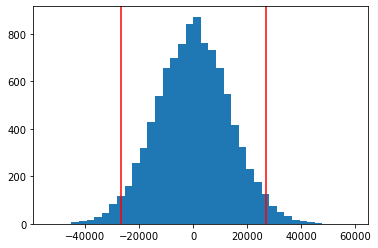

In [20]:
plt.hist((theta1s[burn:] - theta2s[burn:]), bins=40)
plt.axvline(x=p_0025,color='r')
plt.axvline(x=p_0975,color='r')
plt.show()

In [21]:
print("95% equi-tailed credible set: [ {} , {} ]".format(p_0025, p_0975))

95% equi-tailed credible set: [ -26581.915621442815 , 27161.3435941287 ]
